In [56]:
import pandas as pd
import numpy as np  
import os

import matplotlib.pyplot as plt

In [179]:
from cycler import cycler
line_cycler   = (cycler(color=["#FF2525", "#90C4FF", "#009E73", "#0072B2", "#D55E00",  "#F0E442", "#E69F00"]) +
                 cycler(linestyle=["-", "--", "-.", ":", "-", "--", "-."]))

marker_cycler = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["none", "none", "none", "none", "none", "none", "none"]) +
                 cycler(marker=["4", "2", "3", "1", "+", "x", "."]))

# Attack-forg-ep

We attack the model with the >3 mem-sample setand 100 token prefix length


In [101]:
expath = 'mem-tune_replication_package/mem-tune/evaluation/forgeting/experiments/attack_forg_ep/attack_forg_ep.parquet'
# results dataset
df = pd.read_parquet(os.path.join(expath,'attack_forg_ep.parquet'))
df.head()

,prefix_250,prefix_200,prefix_150,prefix_100,suffix,3b_ep0,3b_ep0_em,3b_ep0_bleu,3b_ep0_meteor,3b_ep0_rougeL,...,15b_ep2,15b_ep2_em,15b_ep2_bleu,15b_ep2_meteor,15b_ep2_rougeL,15b_ep3,15b_ep3_em,15b_ep3_bleu,15b_ep3_meteor,15b_ep3_rougeL
0,NotNullAndAfterIsNull() {\n persistence...,null);\n assertThat(events).hasSize(1)...,AuditEventRepository.save(testUserEvent);\n ...,"2);\n assertThat(events).extracting(""pr...",);\n\n PersistentAuditEvent testUserOth...,);\n\n List<PersistenceAuditEvent> even...,0.0,6.345259,0.363941,0.068966,...,);\n\n List<PersistenceAuditEvent> even...,0.0,21.066552,0.281124,0.142857,);\n\n List<PersistenceAuditEvent> even...,0.0,10.774132,0.301205,0.068966
1,;\n public static final int[] FontFamil...,"0300dc, 0x7f0300dd, 0x7f0300de };\n pub...",_fontProviderCerts = 1;\n public static...,Package = 4;\n public static final int ...,"x7f0300df, 0x7f0300e0, 0x7f0300e1, 0x7f030208 ...","x7f0300d8, 0x7f0300d9, 0x7f0300da, 0x7f0300db,...",0.0,4.023186,0.119048,0.000000,...,x7f0300d8 };\n public static final int ...,0.0,14.291174,0.417652,0.266667,x7f0300d8 };\n public static final int ...,0.0,14.291174,0.417652,0.266667
2,"ent, trademark, and\n * attribution ...","(d) If the Work includes a ""NOTICE"" text file...","NOTICE file, excluding those notices that do ...",ivative Works; within the Source form or\n * ...,alongside\n * or as an addendum to ...,alongside\n * or as an addendum to ...,0.0,97.257663,0.997366,0.983607,...,alongside\n * or as an addendum to ...,0.0,35.685138,0.454046,0.400000,alongside\n * or as an addendum to ...,0.0,35.180932,0.499759,0.419355
3,}\n setSystemInformation(recordType);\...,(getPrimaryKey() == null) {\n this...,@JsonIgnore\n public String getLoggedInUse...,JsonIgnore\n public void setSystemInformati...,Status(activeStatus);\n }\n\n @JsonIgnor...,Status(activeStatus);\n }\n\n @JsonIgnor...,0.0,29.203174,0.471799,0.400000,...,Status(activeStatus);\n }\n\n @JsonIgnor...,0.0,28.128435,0.394185,0.444444,Status(activeStatus);\n }\n\n @JsonIgnor...,0.0,34.345031,0.452791,0.588235
4,SIZE} if size is 0.</li>\n * <li>{...,10#CL_MEM_USE_HOST_PTR MEM_USE_HOST_PTR} or {@...,{@code host_ptr} is not {@code NULL} but\n ...,USE_HOST_PTR MEM_USE_HOST_PTR} are not set in ...,OpenCL implementation on the device.</li>\n ...,OpenCL implementation on the device.</li>\n ...,1.0,100.000000,0.999985,1.000000,...,OpenCL implementation for buffer object.</li>...,0.0,32.696253,0.521511,0.321429,OpenCL implementation for\n * buf...,0.0,84.372928,0.814421,0.827586


## StarCoder2-3b

In [102]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
eps = ['ep0', 'ep1', 'ep2', 'ep3']

mean_data = {}


for metric in metrics:
    mean_data[metric] = []
    for ep in eps:
        column_name = f'3b_{ep}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

ep_3b_absolute = pd.DataFrame(mean_data, index=eps)
ep_3b_absolute

,em,bleu,meteor,rougeL
ep0,0.389,65.251022,0.706580,0.682459
ep1,0.087,44.872886,0.551084,0.516902
ep2,0.108,45.209653,0.551985,0.518038
ep3,0.105,44.753549,0.551307,0.514008


In [103]:
# With the baseline
first = ep_3b_absolute.iloc[0]

ep_3b_baseline = ep_3b_absolute.subtract(first)
ep_3b_baseline

,em,bleu,meteor,rougeL
ep0,0.000,0.000000,0.000000,0.000000
ep1,-0.302,-20.378136,-0.155496,-0.165557
ep2,-0.281,-20.041369,-0.154594,-0.164421
ep3,-0.284,-20.497473,-0.155272,-0.168451


## StarCoder2-7b 

In [104]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
eps = ['ep0', 'ep1', 'ep2', 'ep3']

mean_data = {}


for metric in metrics:
    mean_data[metric] = []
    for ep in eps:
        column_name = f'7b_{ep}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

ep_7b_absolute = pd.DataFrame(mean_data, index=eps)
ep_7b_absolute

,em,bleu,meteor,rougeL
ep0,0.395,66.350866,0.719665,0.694137
ep1,0.015,38.141352,0.524810,0.483296
ep2,0.110,46.088452,0.566051,0.527461
ep3,0.116,46.953106,0.572044,0.533803


In [105]:
# With the baseline
first = ep_7b_absolute.iloc[0]

ep_7b_baseline = ep_7b_absolute.subtract(first)
ep_7b_baseline

,em,bleu,meteor,rougeL
ep0,0.000,0.000000,0.000000,0.000000
ep1,-0.380,-28.209514,-0.194855,-0.210841
ep2,-0.285,-20.262414,-0.153614,-0.166676
ep3,-0.279,-19.397761,-0.147621,-0.160333


## StarCoder2-15b

In [106]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
eps = ['ep0', 'ep1', 'ep2', 'ep3']

mean_data = {}


for metric in metrics:
    mean_data[metric] = []
    for ep in eps:
        column_name = f'15b_{ep}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

ep_15b_absolute = pd.DataFrame(mean_data, index=eps)
ep_15b_absolute

,em,bleu,meteor,rougeL
ep0,0.455,71.476775,0.759458,0.738587
ep1,0.145,52.553449,0.613456,0.583241
ep2,0.143,53.086140,0.618905,0.585694
ep3,0.155,54.476512,0.628973,0.595655


In [107]:
# With the baseline
first = ep_15b_absolute.iloc[0]

ep_15b_baseline = ep_15b_absolute.subtract(first)
ep_15b_baseline

,em,bleu,meteor,rougeL
ep0,0.000,0.000000,0.000000,0.000000
ep1,-0.310,-18.923325,-0.146002,-0.155347
ep2,-0.312,-18.390635,-0.140553,-0.152894
ep3,-0.300,-17.000262,-0.130486,-0.142932


## Visuals

In [190]:
df_ep_mem_plot = pd.DataFrame({'3B': ep_3b_absolute['em'], '7B': ep_7b_absolute['em'], '15B': ep_15b_absolute['em']})
df_ep_mem_plot

,3B,7B,15B
ep0,0.389,0.395,0.455
ep1,0.087,0.015,0.145
ep2,0.108,0.110,0.143
ep3,0.105,0.116,0.155


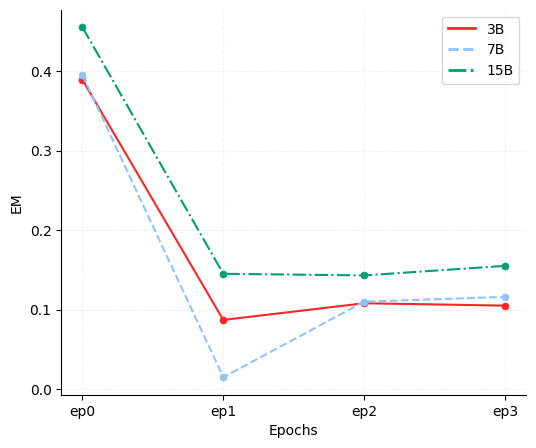

In [193]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], lw=2, label='3B', color='#FF2525', linestyle='-'),
                   Line2D([0], [0], lw=2, label='7B', color='#90C4FF', linestyle='--'),
                   Line2D([0], [0], lw=2, label='15B', color='#009E73', linestyle='-.')]

fig, ax = plt.subplots(figsize=(6, 5))
plt.rc("axes", prop_cycle=line_cycler)

#FF2525", "#90C4FF", "#009E73"


# Define a nice color palette:
labels = ['3B', '7B', '15B']
markers = ['o', 'o', 'o']
#markers = ['s', 'P', 'o']
for i, label in enumerate(labels):
    # Line
    ax.plot(df_ep_mem_plot.index, df_ep_mem_plot[label], label=label , marker=markers[i], markeredgewidth=0.5, markersize=5) #color=colors[i],
    #ax.plot(df_ep_mem_plot.index, df_ep_mem_plot[label], label=label, marker=markers[i] ,color=colors[i])

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
#ax.yaxis.set_ticks_position("left")
#ax.xaxis.set_ticks_position("bottom")

#ax.set_title('Data extraction attack through epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('EM')
plt.legend(frameon=True, handles=legend_elements)
plt.grid(axis='both', color='0.95', linestyle='--')




plt.show()
fig.savefig('./attack_forget_ep.pdf', format='pdf')

In [176]:
forge_ep0 = df_ep_mem_plot.T['ep0']
forge_ep3 = df_ep_mem_plot.T['ep3']
forge_ep3

3b     0.105
7b     0.116
15b    0.155
Name: ep3, dtype: float64

In [92]:
df_ep_mem_plot.T

,ep0,ep1,ep2,ep3
3b,0.389,0.087,0.108,0.105
7b,0.395,0.015,0.110,0.116
15b,0.455,0.145,0.143,0.155


In [282]:
df_ep_mem_plot.T

,ep0,ep1,ep2,ep3
3B,0.389,0.087,0.108,0.105
7B,0.395,0.015,0.110,0.116
15B,0.455,0.145,0.143,0.155


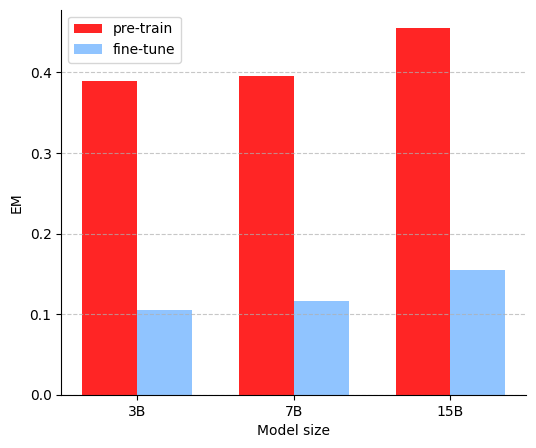

In [210]:
#"#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"
ep0 = df_ep_mem_plot.T['ep0'] 
ep3 = df_ep_mem_plot.T['ep3']

indices = range(len(ep0))
names = df_ep_mem_plot.T.index

# Calculate optimal width
width = 0.35  # Adjusted to be constant and easy to manage

fig, ax = plt.subplots(figsize=(6, 5))
plt.rc("axes", prop_cycle=line_cycler)


# Plot bars
bar1 = ax.bar(np.array(indices) - width/2, ep0, width, label='pre-train')
bar2 = ax.bar(np.array(indices) + width/2, ep3, width,  label='fine-tune')

# Set the x-ticks and x-tick labels
ax.set_xticks(indices)
ax.set_xticklabels(names)

# Add labels and title
ax.set_xlabel('Model size')
ax.set_ylabel('EM')
# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend()

plt.show()
fig.savefig('./attack_forget_msize.pdf', format='pdf')

In [72]:
df_ep_mem_baseline = pd.DataFrame({'3b': ep_3b_baseline['em'], '7b': ep_7b_baseline['em'], '15b': ep_15b_baseline['em']})
df_ep_mem_baseline

,3b,7b,15b
ep0,0.000,0.000,0.000
ep1,-0.302,-0.380,-0.310
ep2,-0.281,-0.285,-0.312
ep3,-0.284,-0.279,-0.300


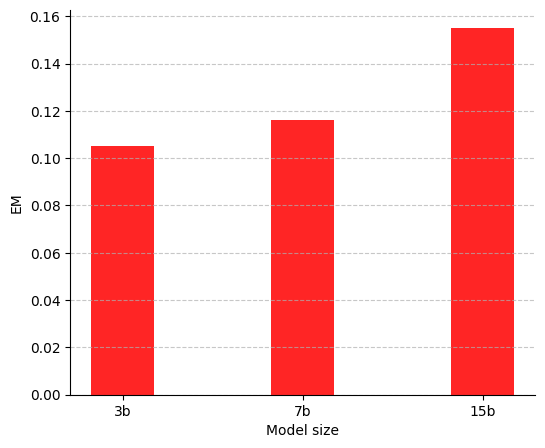

In [183]:
#"#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"
ep3 = df_ep_mem_plot.T['ep3']



indices = range(len(ep0))
names = df_ep_mem_baseline.T.index

# Calculate optimal width
width = 0.35  # Adjusted to be constant and easy to manage

fig, ax = plt.subplots(figsize=(6, 5))
plt.rc("axes", prop_cycle=line_cycler)


# Plot bars
bar1 = ax.bar(indices, ep3, width)
#bar2 = ax.bar(np.array(indices) + width/2, ep3, width,  label='fine-tune')

# Set the x-ticks and x-tick labels
ax.set_xticks(indices)
ax.set_xticklabels(names)

# Add labels and title
ax.set_xlabel('Model size')
ax.set_ylabel('EM')
# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
#ax.legend()

plt.show()

# Attack-mem-plen

We attack the model:
- trained on 3 epochs
- dedup rate >3

We vary the prefix length

In [32]:
expath = '/mem-tune-replication_package/mem-tune/evaluation/forgeting/experiments/attack_forg_plen/attack_forg_plen.parquet'
# results dataset
df = pd.read_parquet(os.path.join(expath,'attack_forg_plen.parquet'))
df.head()

,prefix_250,prefix_200,prefix_150,prefix_100,suffix,3b_ep0_p100,3b_ep0_p150,3b_ep0_p200,3b_ep0_p250,3b_ep0_p100_em,...,15b_ep3_p150_meteor,15b_ep3_p150_rougeL,15b_ep3_p200_em,15b_ep3_p200_bleu,15b_ep3_p200_meteor,15b_ep3_p200_rougeL,15b_ep3_p250_em,15b_ep3_p250_bleu,15b_ep3_p250_meteor,15b_ep3_p250_rougeL
0,NotNullAndAfterIsNull() {\n persistence...,null);\n assertThat(events).hasSize(1)...,AuditEventRepository.save(testUserEvent);\n ...,"2);\n assertThat(events).extracting(""pr...",);\n\n PersistentAuditEvent testUserOth...,);\n\n List<PersistenceAuditEvent> even...,);\n\n List<AuditEvent> events = custom...,);\n\n List<AuditEvent> events = custom...,);\n\n List<AuditEvent> events = custom...,0.0,...,0.346390,0.129032,0.0,9.078154,0.292969,0.064516,0.0,9.078154,0.292969,0.064516
1,;\n public static final int[] FontFamil...,"0300dc, 0x7f0300dd, 0x7f0300de };\n pub...",_fontProviderCerts = 1;\n public static...,Package = 4;\n public static final int ...,"x7f0300df, 0x7f0300e0, 0x7f0300e1, 0x7f030208 ...","x7f0300d8, 0x7f0300d9, 0x7f0300da, 0x7f0300db,...","x7f0300d8, 0x7f0300d9, 0x7f0300da, 0x7f0300db,...","x7f0300d8, 0x7f0300d9, 0x7f0300da, 0x7f0300db,...",x7f0300d8 };\n public static final int ...,0.0,...,0.417652,0.266667,0.0,18.496911,0.498110,0.320000,0.0,14.291174,0.417652,0.266667
2,"ent, trademark, and\n * attribution ...","(d) If the Work includes a ""NOTICE"" text file...","NOTICE file, excluding those notices that do ...",ivative Works; within the Source form or\n * ...,alongside\n * or as an addendum to ...,alongside\n * or as an addendum to ...,alongside\n * or as an addendum to ...,alongside\n * or as an addendum to ...,alongside\n * or as an addendum to ...,0.0,...,0.391579,0.372881,0.0,35.271867,0.438360,0.385965,0.0,27.794408,0.349787,0.360656
3,}\n setSystemInformation(recordType);\...,(getPrimaryKey() == null) {\n this...,@JsonIgnore\n public String getLoggedInUse...,JsonIgnore\n public void setSystemInformati...,Status(activeStatus);\n }\n\n @JsonIgnor...,Status(activeStatus);\n }\n\n @JsonIgnor...,Status(activeStatus);\n }\n\n @JsonIgnor...,Status(activeStatus);\n }\n\n @JsonIgnor...,Status(activeStatus);\n }\n\n @JsonIgnor...,0.0,...,0.453764,0.411765,0.0,44.566347,0.664169,0.484848,0.0,29.586429,0.436481,0.424242
4,SIZE} if size is 0.</li>\n * <li>{...,10#CL_MEM_USE_HOST_PTR MEM_USE_HOST_PTR} or {@...,{@code host_ptr} is not {@code NULL} but\n ...,USE_HOST_PTR MEM_USE_HOST_PTR} are not set in ...,OpenCL implementation on the device.</li>\n ...,OpenCL implementation on the device.</li>\n ...,OpenCL implementation on the device.</li>\n ...,OpenCL implementation on the device.</li>\n ...,OpenCL implementation on the device.</li>\n ...,1.0,...,0.814421,0.827586,0.0,84.372928,0.814421,0.827586,0.0,84.982665,0.828125,0.896552


## StarCoder2-3b

In [34]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
plens = ['p100', 'p150', 'p200', 'p250']
eps = ['ep0', 'ep3']

mean_data = {}

for metric in metrics:
    mean_data[metric] = []
    for plen in plens:
        column_name = f'3b_{eps[1]}_{plen}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

plen_3b_absolute = pd.DataFrame(mean_data, index=plens)
plen_3b_absolute

,em,bleu,meteor,rougeL
p100,0.105,44.753549,0.551307,0.514008
p150,0.124,50.312598,0.598390,0.566398
p200,0.151,52.644819,0.613336,0.583379
p250,0.150,53.433887,0.618727,0.592549


In [35]:
# With the baseline

# compute the baselines
mean_data = {}

for metric in metrics:
    mean_data[metric] = []
    for plen in plens:
        column_name = f'3b_{eps[0]}_{plen}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

plen_3b_ep0 = pd.DataFrame(mean_data, index=plens)
plen_3b_baseline = plen_3b_absolute.subtract(plen_3b_ep0)
plen_3b_baseline

,em,bleu,meteor,rougeL
p100,-0.284,-20.497473,-0.155272,-0.168451
p150,-0.308,-18.550568,-0.137420,-0.145889
p200,-0.311,-18.854825,-0.142840,-0.153940
p250,-0.333,-19.417512,-0.150399,-0.159023


In [36]:
plen_3b_ep0

,em,bleu,meteor,rougeL
p100,0.389,65.251022,0.706580,0.682459
p150,0.432,68.863166,0.735811,0.712288
p200,0.462,71.499644,0.756176,0.737319
p250,0.483,72.851398,0.769126,0.751572


## StarCode2-7b

In [37]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
plens = ['p100', 'p150', 'p200', 'p250']
eps = ['ep0', 'ep3']

mean_data = {}

for metric in metrics:
    mean_data[metric] = []
    for plen in plens:
        column_name = f'7b_{eps[1]}_{plen}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

plen_7b_absolute = pd.DataFrame(mean_data, index=plens)
plen_7b_absolute

,em,bleu,meteor,rougeL
p100,0.116,46.953106,0.572044,0.533803
p150,0.150,52.447396,0.615700,0.581515
p200,0.171,54.607682,0.631366,0.599248
p250,0.178,56.036862,0.642300,0.612785


In [38]:
# With the baseline

# compute the baselines
mean_data = {}

for metric in metrics:
    mean_data[metric] = []
    for plen in plens:
        column_name = f'7b_{eps[0]}_{plen}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

plen_7b_ep0 = pd.DataFrame(mean_data, index=plens)
plen_7b_baseline = plen_7b_absolute.subtract(plen_7b_ep0)
plen_7b_baseline

,em,bleu,meteor,rougeL
p100,-0.279,-19.397761,-0.147621,-0.160333
p150,-0.302,-18.540148,-0.141045,-0.152364
p200,-0.314,-18.462455,-0.140814,-0.154554
p250,-0.320,-18.194811,-0.139404,-0.150974


In [39]:
plen_7b_ep0

,em,bleu,meteor,rougeL
p100,0.395,66.350866,0.719665,0.694137
p150,0.452,70.987544,0.756745,0.733879
p200,0.485,73.070137,0.772180,0.753802
p250,0.498,74.231672,0.781704,0.763759


## StarCoder2-15b

In [40]:
# Extract and calculate means
metrics = ['em', 'bleu', 'meteor', 'rougeL']
plens = ['p100', 'p150', 'p200', 'p250']
eps = ['ep0', 'ep3']

mean_data = {}

for metric in metrics:
    mean_data[metric] = []
    for plen in plens:
        column_name = f'15b_{eps[1]}_{plen}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

plen_15b_absolute = pd.DataFrame(mean_data, index=plens)
plen_15b_absolute

,em,bleu,meteor,rougeL
p100,0.155,54.476512,0.628973,0.595655
p150,0.198,57.747969,0.657065,0.624595
p200,0.220,59.912378,0.675412,0.645606
p250,0.235,61.837029,0.687467,0.660390


In [41]:
# With the baseline

# compute the baselines
mean_data = {}

for metric in metrics:
    mean_data[metric] = []
    for plen in plens:
        column_name = f'15b_{eps[0]}_{plen}_{metric}'
        mean_value = df[column_name].mean()
        mean_data[metric].append(mean_value)

plen_15b_ep0 = pd.DataFrame(mean_data, index=plens)
plen_15b_baseline = plen_15b_absolute.subtract(plen_15b_ep0)
plen_15b_baseline

,em,bleu,meteor,rougeL
p100,-0.300,-17.000262,-0.130486,-0.142932
p150,-0.308,-17.993250,-0.134765,-0.150294
p200,-0.316,-17.756623,-0.130953,-0.148597
p250,-0.314,-17.094791,-0.131974,-0.144755


In [42]:
plen_15b_ep0

,em,bleu,meteor,rougeL
p100,0.455,71.476775,0.759458,0.738587
p150,0.506,75.741218,0.791830,0.774889
p200,0.536,77.669001,0.806365,0.794204
p250,0.549,78.931820,0.819442,0.805144


## Visuals

In [194]:
df_plen_ep0 = pd.DataFrame({'3B': plen_3b_ep0['em'], '7B': plen_7b_ep0['em'], '15B': plen_15b_ep0['em']})
df_plen_ep0

,3B,7B,15B
p100,0.389,0.395,0.455
p150,0.432,0.452,0.506
p200,0.462,0.485,0.536
p250,0.483,0.498,0.549


In [195]:
df_plen_ep3 = pd.DataFrame({'3B': plen_3b_absolute['em'], '7B': plen_7b_absolute['em'], '15B': plen_15b_absolute['em']})
df_plen_ep3

,3B,7B,15B
p100,0.105,0.116,0.155
p150,0.124,0.150,0.198
p200,0.151,0.171,0.220
p250,0.150,0.178,0.235


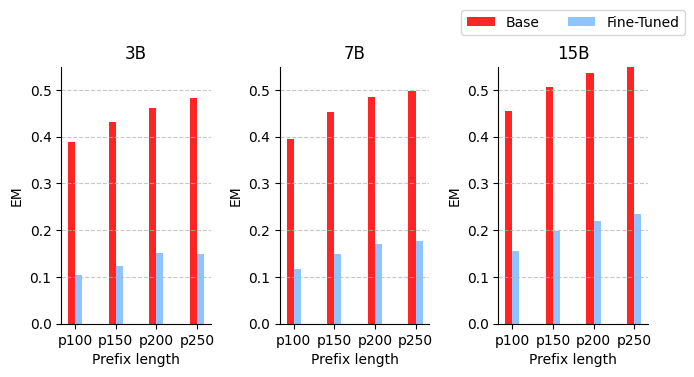

In [281]:
plt.rc("axes", prop_cycle=line_cycler)


fig, axes = plt.subplots(1, 3, figsize=(7, 4))  # Increased figure width
axes = axes.flatten()

# Number of bars (prefix lengths)
num_bars = len(df_plen_ep0.index)
bar_width = 0.35

# Define a color palette
labels = ['3B', '7B', '15B']
max_value = max(df_plen_ep0.max().max(), df_plen_ep3.max().max())

# Define positions for the bars
bar_positions = np.arange(num_bars)  # x positions for bars

for i, label in enumerate(labels):
    ax = axes[i]
    
    # Define width for each group
    width = bar_width / 2  # Since there are two groups for each label (ptrain and ftune)
    
    # Positions for the bars in this group
    positions_ep0 = bar_positions - width / 2  # center align ptrain bars
    positions_ep3 = bar_positions + width / 2  # center align ftune bars
    
    ax.bar(positions_ep0, df_plen_ep0[label], width, label='Base')
    ax.bar(positions_ep3, df_plen_ep3[label], width, label='Fine-Tuned')
    
    # Hide all but the bottom spines (axis lines)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.set_xlabel('Prefix length')
    ax.set_ylabel('EM')
    ax.set_title(f'{label}')
    
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
    
    # Set the same y-axis limit
    ax.set_ylim(0, max_value)
    
    # Set x-ticks to the center of the bars
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(df_plen_ep0.index)
    
    # Optional grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

#plt.legend(bbox_to_anchor=(1, 1))
#plt.legend(loc='upper left', bbox_to_anchor=(-2.4, 1.3), ncol=2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.tight_layout()
plt.show()
fig.savefig('./attack_forget_plen.pdf', format='pdf')

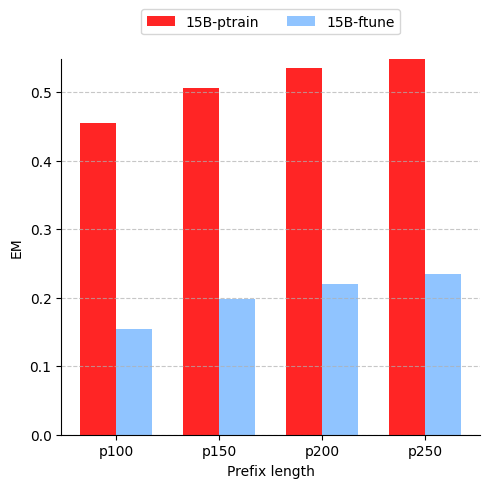

In [197]:
plt.rc("axes", prop_cycle=line_cycler)


# Only plot the last column
last_col = df_plen_ep0.columns[-1]
fig, axes = plt.subplots(1, 1, figsize=(5, 5))  # Single subplot for last column

bar_width = 0.35  # Width of each bar
bar_positions = np.arange(len(df_plen_ep0.index))  # x positions for bars

# Plotting
ax = axes
ax.bar(bar_positions - bar_width / 2, df_plen_ep0[last_col], bar_width, label=f'{last_col}-ptrain')
ax.bar(bar_positions + bar_width / 2, df_plen_ep3[last_col], bar_width, label=f'{last_col}-ftune')

# Hide spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Labels and ticks
ax.set_xlabel('Prefix length')
ax.set_ylabel('EM')
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_plen_ep0.index)

# Legend and grid
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
ax.set_ylim(0, max(df_plen_ep0[last_col].max(), df_plen_ep3[last_col].max()))
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
fig.savefig('./attack_forget_plen15.pdf', format='pdf')

In [18]:
df_plen_ep3_base = pd.DataFrame({'3b': plen_3b_baseline['em'], '7b': plen_7b_baseline['em'], '15b': plen_15b_baseline['em']})
df_plen_ep3_base

,3b,7b,15b
p100,-0.284,-0.279,-0.300
p150,-0.308,-0.302,-0.308
p200,-0.311,-0.314,-0.316
p250,-0.333,-0.320,-0.314


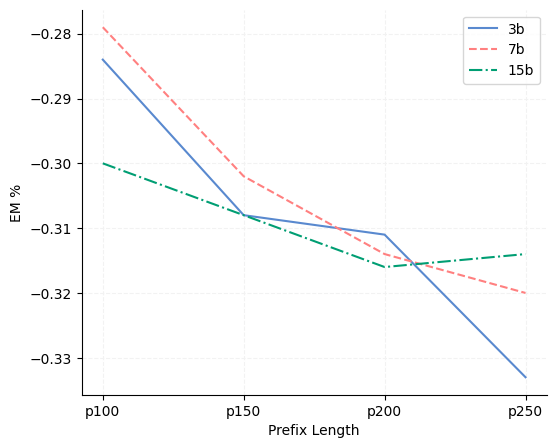

In [172]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.rc("axes", prop_cycle=line_cycler)



# Define a nice color palette:
labels = ['3b', '7b', '15b']
markers = ['o', 'o', 'o']
#markers = ['s', 'P', 'o']
for i, label in enumerate(labels):
    # Line
    ax.plot(df_plen_ep3_base.index, df_plen_ep3_base[label], label=label , markeredgewidth=0.5, markersize=5) #color=colors[i],
    #ax.plot(df_plen_ep3_base.index, df_plen_ep3_base[label], label=label, marker=markers[i] ,color=colors[i])

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
#ax.yaxis.set_ticks_position("left")
#ax.xaxis.set_ticks_position("bottom")

#ax.set_title('Data extraction attack through epochs')
ax.set_xlabel('Prefix Length')
ax.set_ylabel('EM %')
plt.legend(frameon=True)
plt.grid(axis='both', color='0.95', linestyle='--')




plt.show()
fig.savefig('./attack_forget_plen_line.pdf', format='pdf')

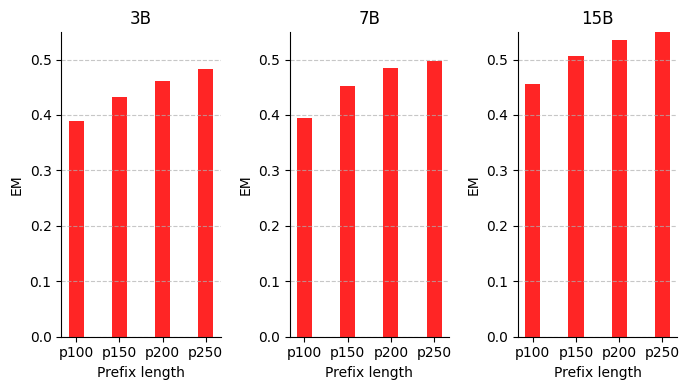

In [207]:
plt.rc("axes", prop_cycle=line_cycler)

fig, axes = plt.subplots(1, 3, figsize=(7, 4))  # Increased figure width
axes = axes.flatten()

# Number of bars (prefix lengths)
num_bars = len(df_plen_ep0.index)
bar_width = 0.35

# Define a color palette
labels = ['3B', '7B', '15B']
max_value = max(df_plen_ep0.max().max(), df_plen_ep3.max().max())

# Define positions for the bars
bar_positions = np.arange(num_bars)  # x positions for bars

for i, label in enumerate(labels):
    ax = axes[i]
    
    # Define width for each group
    width = bar_width #/ 2  # Since there are two groups for each label (ptrain and ftune)
    
    # Positions for the bars in this group
    positions_ep0 = bar_positions #- width / 2  # center align ptrain bars
    positions_ep3 = bar_positions #+ width / 2  # center align ftune bars
    
    ax.bar(positions_ep0, df_plen_ep0[label], width, label=f'{label}')
    #ax.bar(positions_ep3, df_plen_ep3[label], width, label=f'{label}-ftune')
    
    # Hide all but the bottom spines (axis lines)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.set_xlabel('Prefix length')
    ax.set_ylabel('EM')
    ax.set_title(label)
    
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=False, handlelength=0)
    # Set the same y-axis limit
    ax.set_ylim(0, max_value)
    
    # Set x-ticks to the center of the bars
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(df_plen_ep0.index)
    
    # Optional grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
fig.savefig('./attack_forget_plen_pre.pdf', format='pdf')

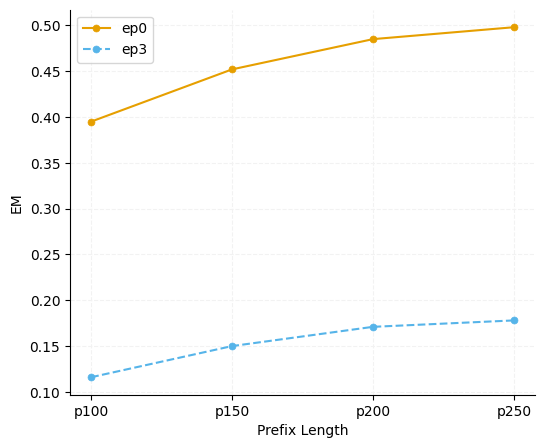

In [30]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], lw=2, label='3b', color='#E69F00', linestyle='-'),
                   Line2D([0], [0], lw=2, label='7b', color='#56B4E9', linestyle='--'),
                   Line2D([0], [0], lw=2, label='15b', color='#009E73', linestyle='-.')]

fig, ax = plt.subplots(figsize=(6, 5))
plt.rc("axes", prop_cycle=line_cycler)



# Define a nice color palette:
labels = ['ep0', 'ep3']
markers = ['o', 'o']
#markers = ['s', 'P', 'o']
for i, label in enumerate(labels):
    # Line
    ax.plot(df_plen_diff.index, df_plen_diff[label], label=label , marker=markers[i], markeredgewidth=0.5, markersize=5) #color=colors[i],
    #ax.plot(df_plen_ep3_base.index, df_plen_ep3_base[label], label=label, marker=markers[i] ,color=colors[i])

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
#ax.yaxis.set_ticks_position("left")
#ax.xaxis.set_ticks_position("bottom")

#ax.set_title('Data extraction attack through epochs')
ax.set_xlabel('Prefix Length')
ax.set_ylabel('EM')
plt.legend(frameon=True)
plt.grid(axis='both', color='0.95', linestyle='--')




plt.show()
fig.savefig('./attack_forget_plen_line.pdf', format='pdf')